In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import squarify as sq

import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as po

df = pd.read_csv('parts_sellers.csv')
df = df[df.year_sales > 0]
df.year_sales = pd.to_numeric(df.year_sales, errors='coerce')
df = df.sort_values(by=['year_sales'], ascending=False)
sum_fvf = df.year_fvf.sum()
df['percent_fvf'] = [x / sum_fvf for x in df.year_fvf]
df.percent_fvf = pd.Series(["{0:.1f}%".format(val * 100) for val in df.percent_fvf], index = df.index)

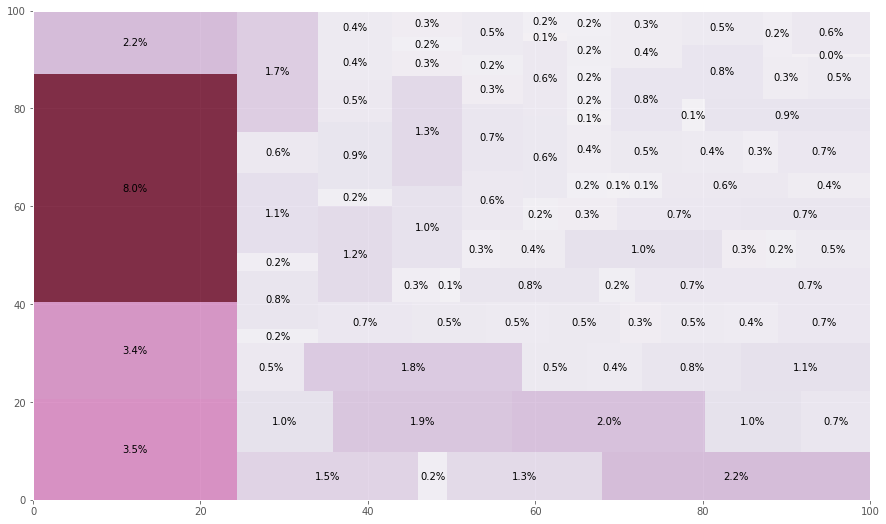

In [57]:
norm = matplotlib.colors.Normalize(vmin=min(df.year_sales), vmax=max(df.year_sales))

values = df.year_fvf[0:96]

cmap = matplotlib.cm.PuRd
mini=min(values)
maxi=max(values)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in values ]

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15.0, 9.0)

fig = sq.plot(sizes=values, label = df.percent_fvf, color=colors, alpha=.8 )
plt.savefig('top96sellers_treemap.png', bbox_inches='tight')
plt.show()

